In [2]:
import pandas as pd
churn_data = pd.read_csv("data/churn.csv")

# Библиотека Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Видеть графики в темной теме
plt.style.use('default')

# Библиотека Seaborn
import seaborn as sns


Столбцы:
RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [3]:
# Копия файла
churn_copy = churn_data.copy()

# Удаление не нужных столбцов
churn_copy = churn_copy.drop(["RowNumber", "Surname"], axis = 1)


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

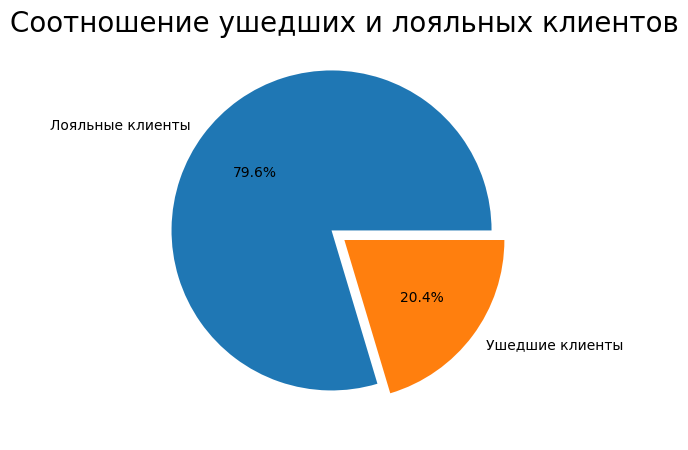

In [3]:
# Создание холста и координатных плоскостей
fig = plt.figure(figsize=(4,4))
axes = fig.add_axes([0, 0, 1, 1])

# Создание круговой диаграммы
axes.pie(
    churn_copy['Exited'].value_counts(),
    labels= ['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0.1, 0]
)

# Настройка графика
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=20)
plt.show()


Вывод: Из графика видно, что 20.4% ушли из банка, а 79.6% остались лояльны. Это значит каждый пятый клиент перестал пользоваться банком. Нужно выяснить причину оттока.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

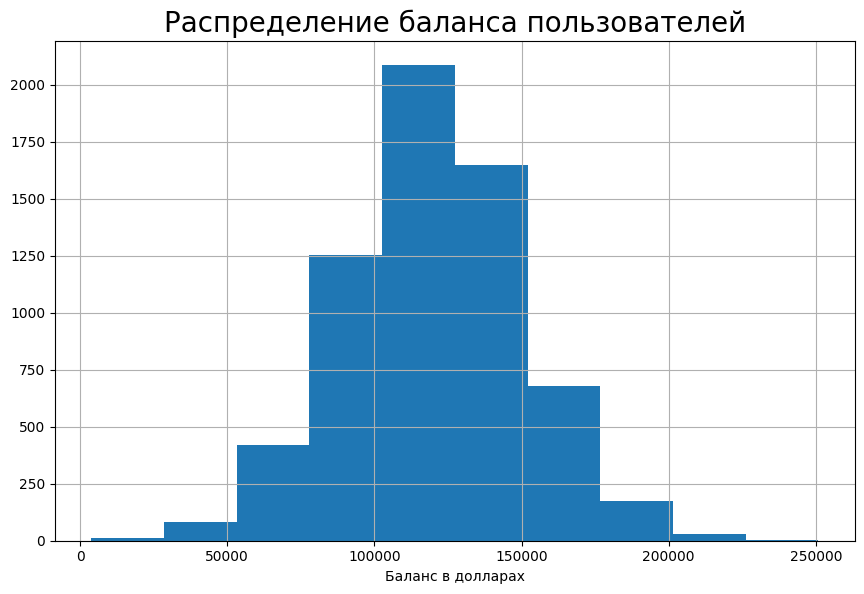

In [4]:
# Создание холста и координатных плоскостей
fig = plt.figure(figsize=(8, 5))
axes = fig.add_axes([0, 0, 1, 1])

# Копия таблицы
churn_copy2 = churn_copy.copy()

# Условие для баланса, на счету должно быть больше 2500 долларов
churn_balance = churn_copy2[churn_copy2["Balance"] > 2500]

# Создание гистограммы
axes.hist(x = churn_balance['Balance'], label=["Баланс пользователей"])

# Настройка графика
axes.set_title('Распределение баланса пользователей', fontsize=20)
axes.grid()
axes.set_xlabel("Баланс в долларах")
plt.show()


Вывод: Из графика можно понять, что большенство клиентов, примерно 4000, предпочитает хранить на счете сумму от 100000 до 150000 долларов. 1250 клиентов хранят сумму от 80000 до 100000 долларов. Около 1000 клиентов хранят на счету сумму больше 150000 долларов. Примерно 400 клиентов хранят сумму от 50000 до 80000 долларов. Остальные хранят меньше 50000 долларов или имеют нулевой баланс.
Можно сделать вывод, что большенство людей, желающих и имеющих возможность оставить деньги в банке, предпочтут держать на счету сумму от 100000 до 150000 долларов.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

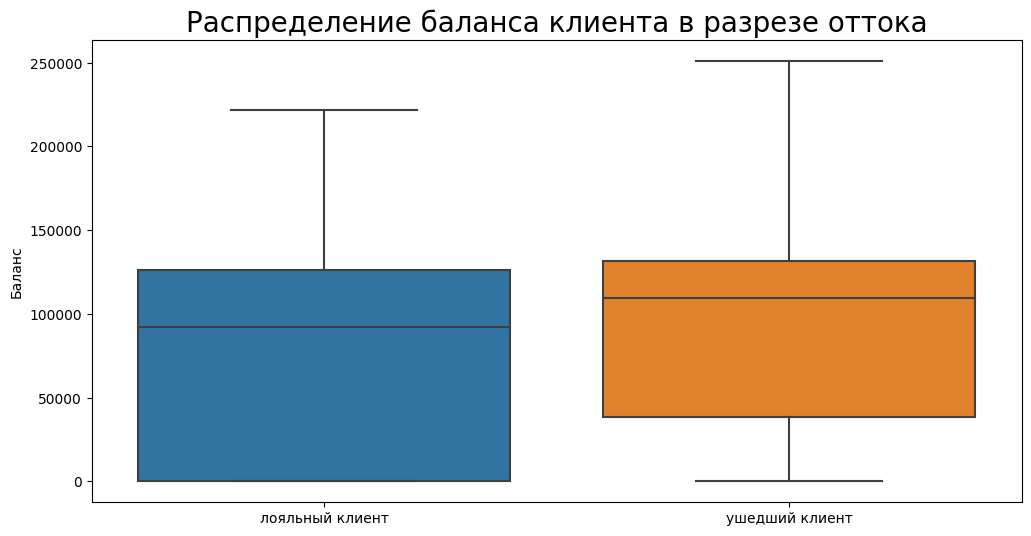

In [5]:
# Создание холста и координатных плоскостей
fig = plt.figure(figsize=(12, 6))

# Преобразовываю таблицу, чтобы график был более понятный
churn_copy3 = churn_copy.copy()
churn_copy3['Exited'] = churn_copy3['Exited'].astype("category")
churn_copy3['Exited'] = churn_copy3['Exited'].cat.rename_categories({0:"лояльный клиент",1:"ушедший клиент"})

# Создание коробчатой диаграммы
churn_box = sns.boxplot(data=churn_copy3, x='Exited', y='Balance')

# Настройка графика
churn_box.set_title('Распределение баланса клиента в разрезе оттока', fontsize=20)
churn_box.set_xlabel("")
churn_box.set_ylabel("Баланс")
plt.show()

Вывод: Из графика видно, что ушедшие клиенты держала на счету по медиане больше чем лояльные клиенты. Так ушедшие клиенты держали сумму больше чем 100000 долларов, в то время как лояльные держали сумму меньше 100000 долларов. Квантель 25 и 75 у лояльных меньше чем ушедших. Длина ящика с усам в максимум у ушедших клиентов больше, так они держали максимальный баланс. А вот минимум у ушедших равен 0. У лояльных квантель 25 равен 0.
Такая разница может быть связана с тем, что клиентам не нравится политика банка насчет счетов. Возможно, не нравится большая коммисия за снятие средств. И люди желающие держать на счету большую сумму решили выбрать другой банк.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

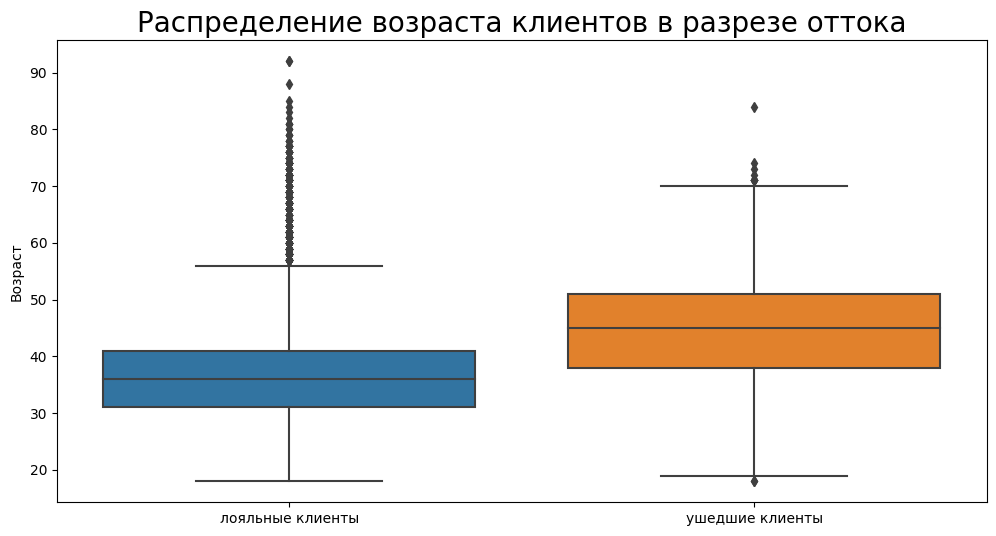

In [6]:
# Создание холста и координатных плоскостей
fig = plt.figure(figsize=(12, 6))

# Преобразовываю таблицу, чтобы график был более понятный
churn_copy4 = churn_copy.copy()
churn_copy4['Exited'] = churn_copy4['Exited'].astype("category")
churn_copy4['Exited'] = churn_copy4['Exited'].cat.rename_categories({0:"лояльные клиенты",1:"ушедшие клиенты"})

# Создание коробчатой диаграммы
churn_boxplot = sns.boxplot(data=churn_copy4, x='Exited', y='Age')

# Настройка графика
churn_boxplot.set_title('Распределение возраста клиентов в разрезе оттока', fontsize=20)
churn_boxplot.set_xlabel("")
churn_boxplot.set_ylabel("Возраст")
plt.show()



Вывод: В лояльной группе больше потенциальных выбросов. Более лояльные банку клиенты в возрасте от 30 до 40 лет. Менее лояльные клиенты в возрасте от 40 до 50.
Банку стоит больше внимание уделять возрастной группе от 40 до 50 лет, узнать причину их ухода, чтобы лучше удерживать их.


9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

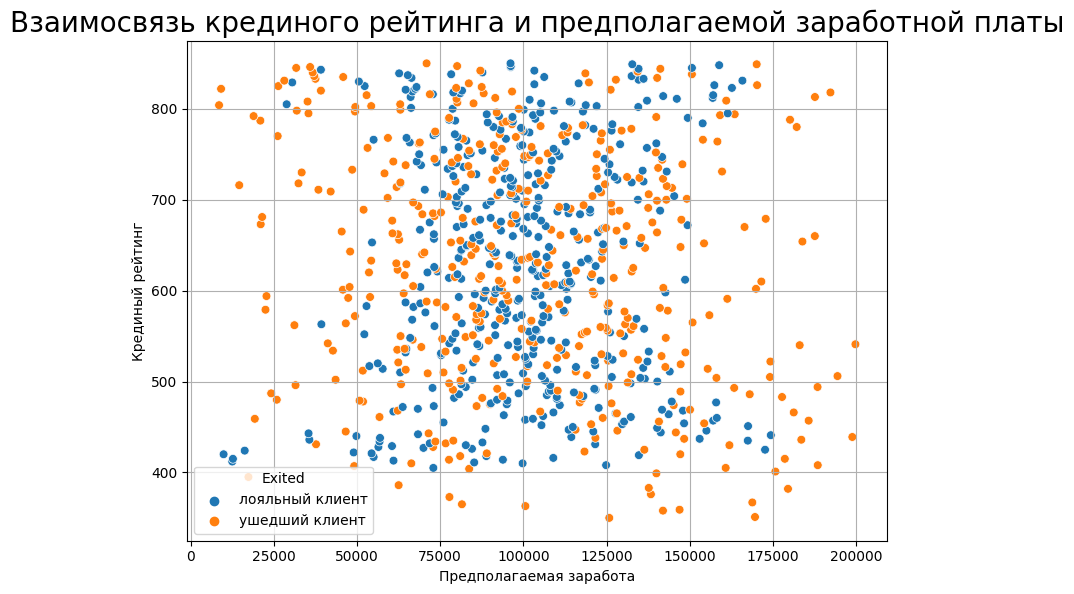

In [7]:
# Создание холста и координатных плоскостей
fig = plt.figure(figsize=(7,5))
axes = fig.add_axes([0, 0, 1, 1])

# Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты
salary_сredit = churn_copy.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()

# Преобразовываю таблицу, чтобы график был более понятный
salary_сredit['Exited'] = salary_сredit['Exited'].astype("category")
salary_сredit['Exited'] = salary_сredit['Exited'].cat.rename_categories({0:"лояльный клиент",1:"ушедший клиент"})

# Создание диаграммы рассеяния
churn_scatter = sns.scatterplot(
    data = salary_сredit,
    x = 'EstimatedSalary',
    y ='CreditScore',
    hue='Exited',
    s=40,
)

# Настройка графика
churn_scatter.set_title('Взаимосвязь крединого рейтинга и предполагаемой заработной платы', fontsize=20)
churn_scatter.grid()
churn_scatter.set_xlabel("Предполагаемая заработа")
churn_scatter.set_ylabel("Крединый рейтинг")
plt.show()


Вывод: На данном графике не вижу явной взаимосвязи между кредитным рейтингом, предпологаемой зарплатой и лояльностью клиента.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
(Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).)

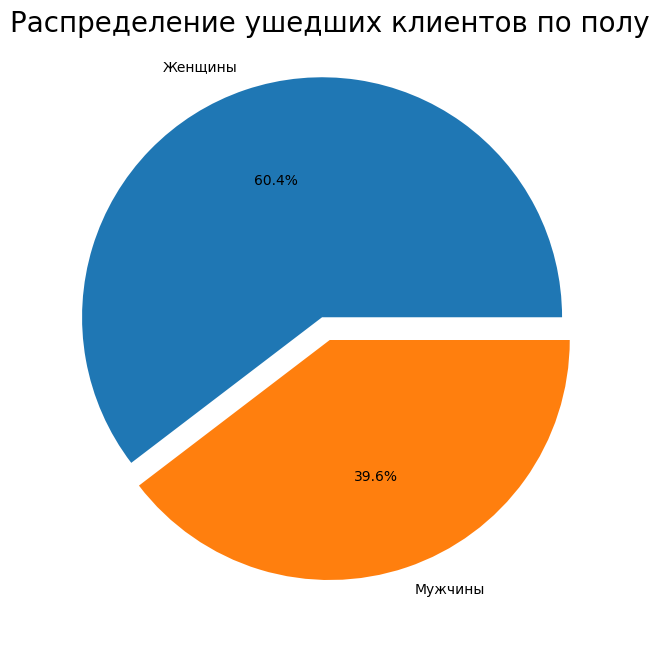

In [15]:
# Создание холста и координатных плоскостей
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

# Количество ушедших клиентов, взависимости от пола
gender_data = churn_copy.groupby('Gender', as_index=False)['Exited'].mean() 
#print(gender_data)

# Создание круговой диаграммы
ax.pie(
    gender_data["Exited"].sort_values(ascending=False),

    labels= ['Женщины', 'Мужчины'],
    autopct='%.1f%%',
    explode = [0.1, 0]
)

# Настройка графика
ax.set_title('Распределение ушедших клиентов по полу', fontsize=20)
plt.show()


Вывод: Чаще перестают пользоваться данным банком женщины, чем мужчины. 

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

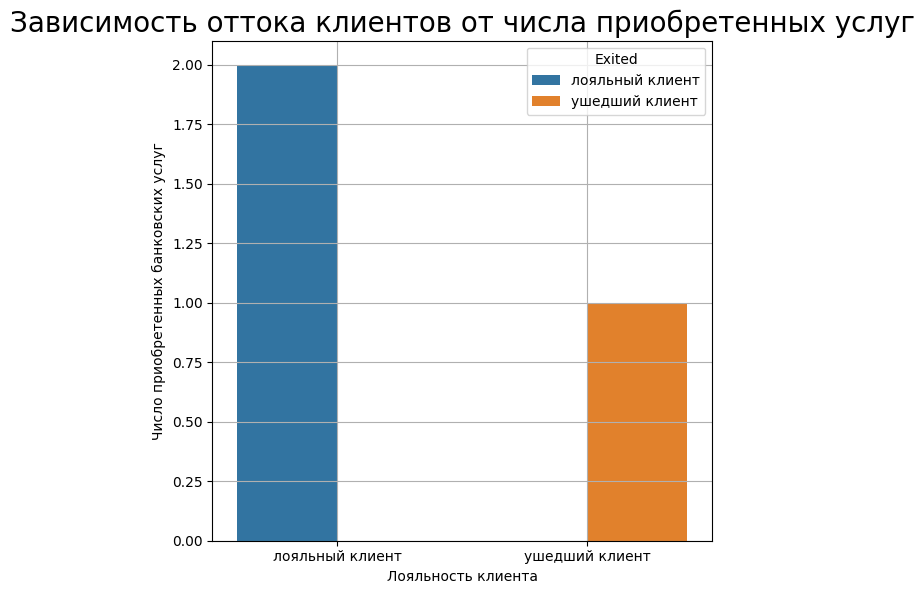

In [9]:
# Создание холста и координатных плоскостей
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

# Влияние оттока клиентов от числа приобретенных у банка услуг
products_churn = churn_copy.groupby(['Exited'], as_index=False)['NumOfProducts'].median()

# Преобразовываю таблицу, чтобы график был более понятный
products_churn['Exited'] = products_churn['Exited'].astype("category")
products_churn['Exited'] = products_churn['Exited'].cat.rename_categories({0:"лояльный клиент",1:"ушедший клиент"})

# Создание  многоуровневую столбчатую диаграмму
barplot_churn = sns.barplot(
    data=products_churn,
    hue='Exited',
    y ='NumOfProducts',
    x ='Exited'  
)

# Настройка графика
barplot_churn.set_title('Зависимость оттока клиентов от числа приобретенных услуг', fontsize=20)
barplot_churn.grid()
barplot_churn.set_ylabel("Число приобретенных банковских услуг")
barplot_churn.set_xlabel("Лояльность клиента")

plt.show()

Вывод: Чем больше клиент преобретал услуг, тем с меньшей вероятностью он покидает банк.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

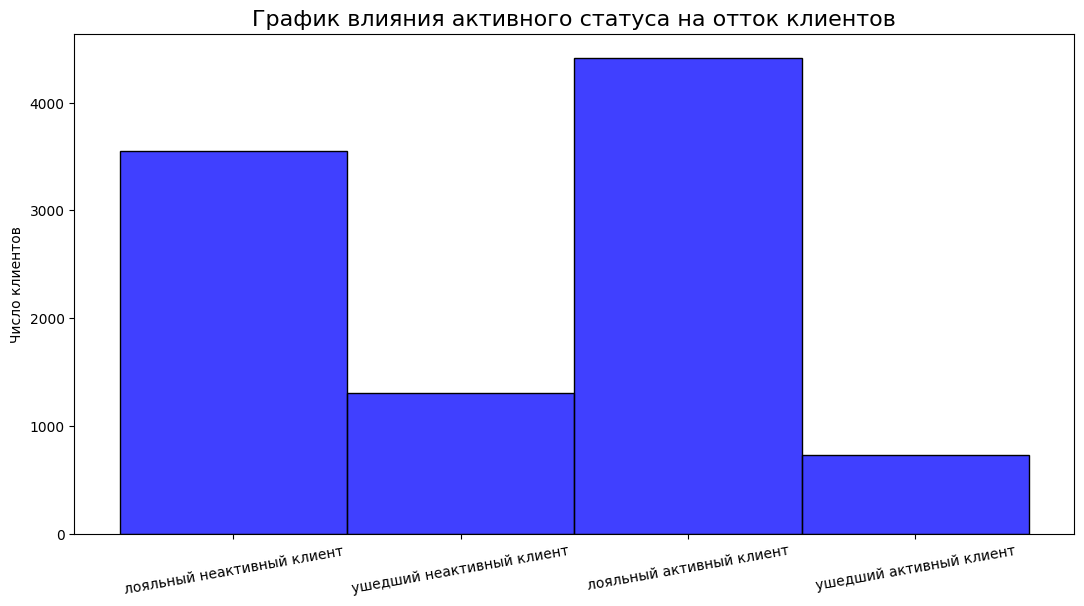

In [10]:
# Создание холста и координатных плоскостей
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

# Подготовка таблицы
churn_copy81 = churn_copy.copy()
churn_copy81 = churn_copy81.drop(['CustomerId','CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'], axis = 1)
churn_copy81['Exited'] = churn_copy81['Exited'] / 2
toll = churn_copy81['IsActiveMember'] + churn_copy81['Exited']
toll = toll.astype("category")
toll = toll.cat.rename_categories({0.0:"лояльный неактивный клиент",1.0:"лояльный активный клиент", 0.5 : "ушедший неактивный клиент", 1.5 :"ушедший активный клиент"})

# Создание гистограммы
sns.histplot(
    data= toll,
    color='blue'
)

# Настройка графика
axes.set_title('График влияния активного статуса на отток клиентов', fontsize=16)
axes.set_ylabel("Число клиентов")
axes.set_xlabel("")
axes.tick_params(axis='x', rotation=10)
plt.show()

Вывод: Статус активный клиент уменьшает оттока из банка. 
Чтобы уменьшить отток клиентов имеющих статус неактивный, я порекомендовала подстигнуть неактивных пользователей, и перевести их в статус активнных, тем самым уменьшив вероятность их ухода. Подстигнуть можно предлогая более выгодные условия на предоставляемые услуги. Еще нужно делать максимально удобные сервесы для людей, чтобы им нравилось пользоваться банком.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [5]:
# Библиотека Plotly
import plotly
import plotly.express as px

#Доля ущедших клиентов
geo_churn = churn_copy.groupby(['Geography'], as_index=False)['Exited'].agg('mean')

# Создание тепловой картограммы
heatmap_geo = px.choropleth(
    data_frame = geo_churn,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    title='Отток клиентов в разных странах',
    color_continuous_scale='blues',
    range_color=[0, 0.5],
    width=800, 
    height=800, 
)

heatmap_geo.show()

Вывод: Самый большой отток клиентов в Германии. Возможно данный банк более распространен в Германии, чем в других страннах, отсюда и отток больше.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

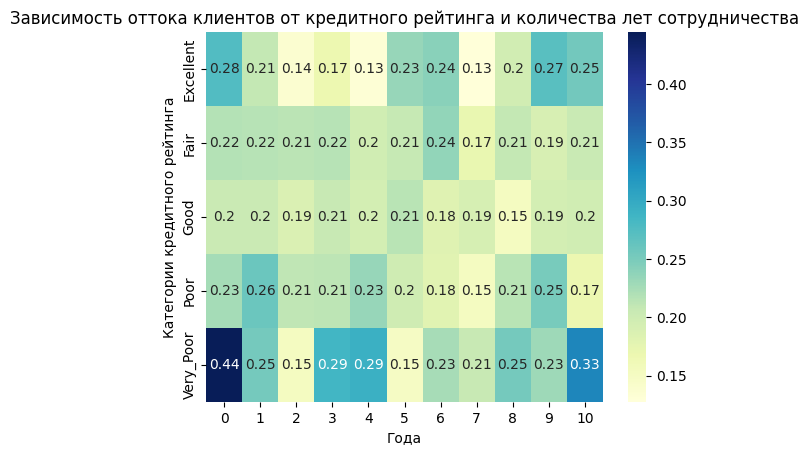

In [12]:
# Функция переводит числовой признак CreditScore в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

# Копия таблицы
churn_copy10 = churn_copy.copy()

# Применение функции
churn_copy10['CreditScoreCat'] = churn_copy10['CreditScore'].apply(get_credit_score_cat)

# Сводная таблица
churn_pivot = churn_copy10.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc = 'mean'
)
# Создание тепловой карты
fig = plt.figure()
ax_heatmap = sns.heatmap(data=churn_pivot, annot=True, cmap='YlGnBu')

# Настройка графика
ax_heatmap.set_title('Зависимость оттока клиентов от кредитного рейтинга и количества лет сотрудничества')
ax_heatmap.set_xlabel('Года')
ax_heatmap.set_ylabel('Категории кредитного рейтинга')
plt.show()


Вывод: Чаще всего уходят люди из группы Very_Poor, которые использовали банк меньше года. После них по частоте ухода стоят клиенты из той же группы, которые использовали банка 10 лет, а за ними клиенты из той же группы пользовавшиеся банком 3-4 года.

Воспроизводимость кода
pandas==1.5.1
matplotlib==3.6.2
matplotlib-inline==0.1.6
seaborn==0.12.
plotly==5.11.0
Python 3.10.7